
# <center> Machine learning algorithms project </center>
## <center> Pet adoptions speed prediction</center>
#### <center> Work done by Paul Peyssard, Supervised by Michel Riveill and Diane Lingrand</center>
#### <center> MSc Data Science & Artificial Intelligence</center>


The dataset presents pet's characteristics and includes tabular, text and image data. It comes from: https://www.petfinder.my.

The aim is to predict the rate at which a pet is adopted.

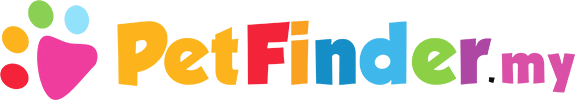



# Project description :

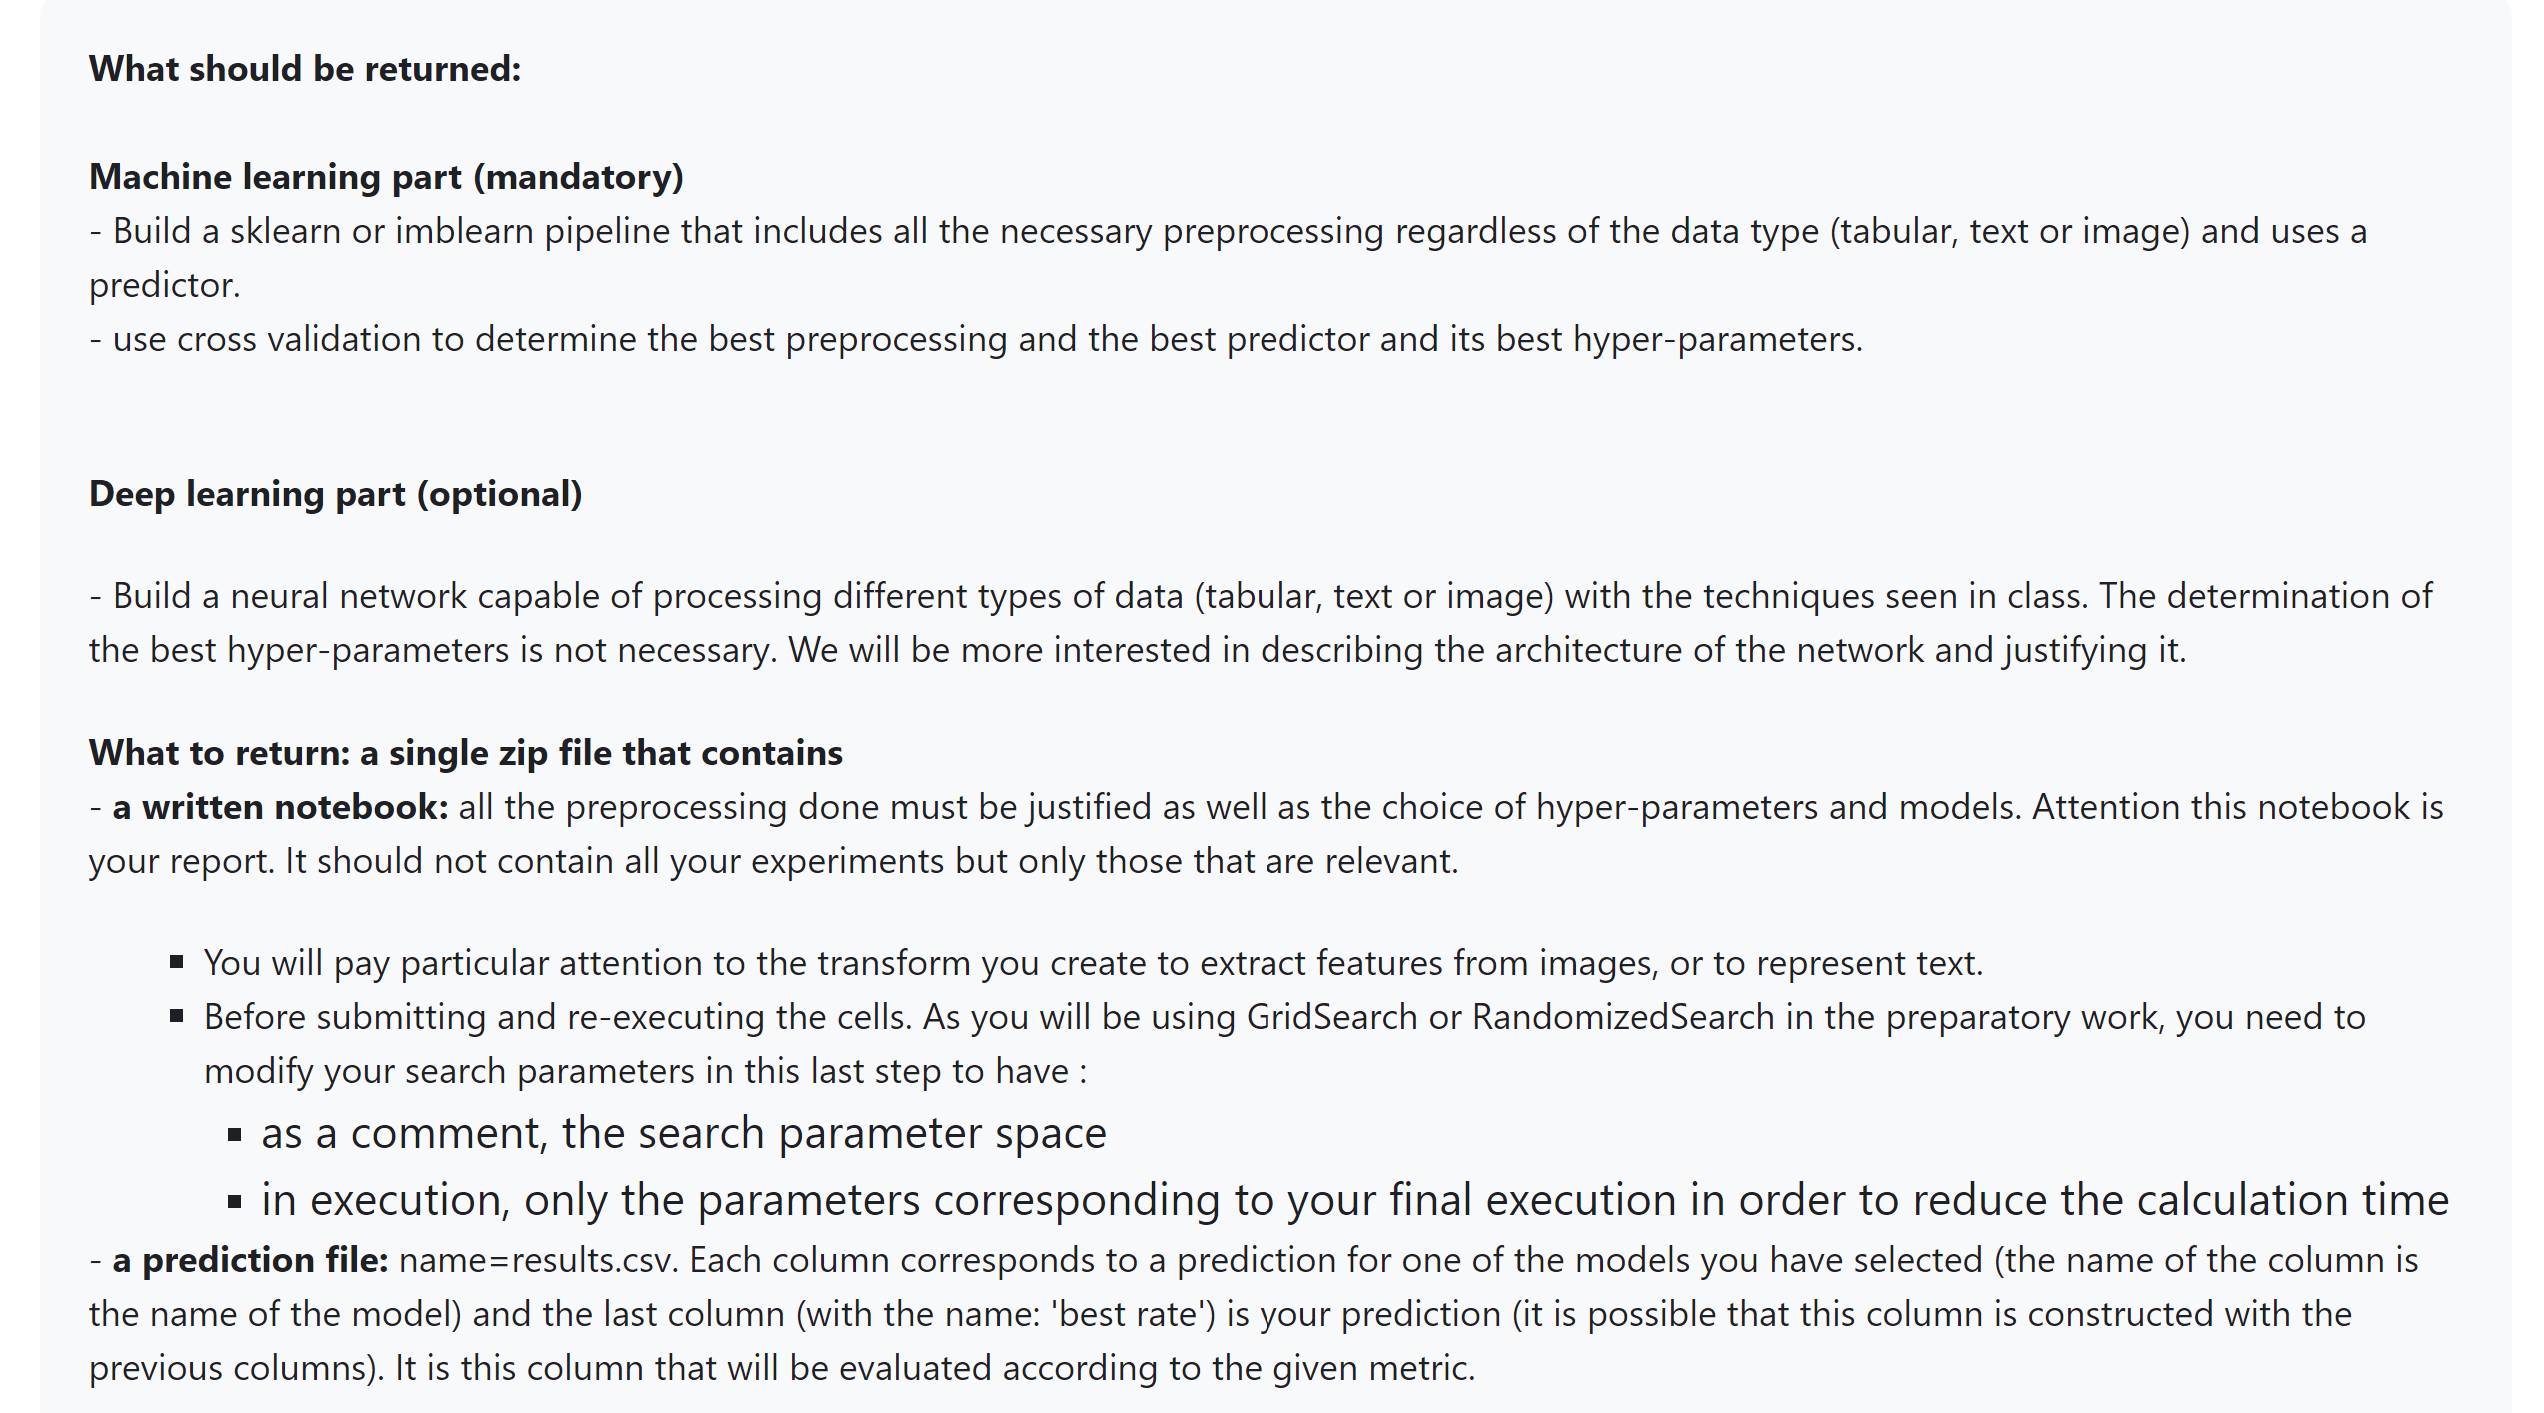

# Introduction

In this project, I will explain how I manage to predict pet's Adoption speed with machine learning algorithms. For that, we use the petfinder dataset composed of different variable such as images, text, categorical and numerical variables. The train set is composed of 9000 elements and the test data is composed of 500 elements. The goal is to learn how to use Machine Learning models with all the elements seen during the 1st year of MSc Data Science & Artificial Intelligence.

In this project, we will start by processing the data, then we will see how to create transformers to transform the data inside a pipeline, the last step will be to understand how to select the best model with the best hyper-parameters and try to improve it.

For this project, the metric used is the Quadratic Kappa Metric.

### Librairies

In [1]:
import pandas as pd 
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import time
import cv2

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, f1_score,cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.ensemble import AdaBoostClassifier



In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.porter import PorterStemmer

### Importing the datasets

Importing csv file present in the same directory as the notebook

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Overview of the dataset

Let's have a quick overview of the dataset in order to understand it better

In [5]:
train.head(2)

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed
0,Dog,84.0,Male,Brown,Cream,Unknown,Small,No,Unknown,Yes,No,Healthy,0.0,He is either lost or abandoned. Please contact...,4.0,3b178aa59-5.jpg,Terrier
1,Dog,1.0,Female,Black,Unknown,Unknown,Medium,Yes,No,Yes,No,Healthy,50.0,"Hi, my name is Rose. I'm very friendly and am ...",3.0,2fbf2cb7c-1.jpg,Mixed_Breed


In [6]:
test.head(2)

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed
0,Cat,1.0,Male,Black,White,Unknown,Small,Yes,No,No,No,Healthy,0.0,"kitten for adoption, pls call for enquiry, off...",5df99d229-2.jpg,Domestic_Short_Hair
1,Dog,8.0,Male,Black,Brown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Stray puppy that came to my house. Obedient, w...",a08030c6f-2.jpg,Mixed_Breed


In [7]:
print("Test shape :",test.shape) # 1 less column than train because no Adoption speed yet
print("Train shape :",train.shape)

Test shape : (500, 16)
Train shape : (9000, 17)


Let's check the types

In [8]:
train.dtypes

Type              object
Age              float64
Gender            object
Color1            object
Color2            object
Color3            object
MaturitySize      object
FurLength         object
Vaccinated        object
Dewormed          object
Sterilized        object
Health            object
Fee              float64
Description       object
AdoptionSpeed    float64
Images            object
Breed             object
dtype: object

In [9]:
test.dtypes

Type             object
Age             float64
Gender           object
Color1           object
Color2           object
Color3           object
MaturitySize     object
FurLength        object
Vaccinated       object
Dewormed         object
Sterilized       object
Health           object
Fee             float64
Description      object
Images           object
Breed            object
dtype: object

Types are correct and the same in both dataset

### Let's check if the train dataset need some cleaning

Null values :

In [10]:
train.isnull().any()

Type             False
Age              False
Gender           False
Color1           False
Color2           False
Color3           False
MaturitySize     False
FurLength        False
Vaccinated       False
Dewormed         False
Sterilized       False
Health           False
Fee              False
Description      False
AdoptionSpeed    False
Images           False
Breed            False
dtype: bool

There is no null value in the train set

### Let's have an overall look on the unique values

**First, let's check the age because its one of the most important feature and its not the same age system for dog and cats**

In [11]:
train.loc[train['Type'] == 'Cat', 'Age'].unique()

array([  4.,   1.,   2.,  12.,  16.,   5.,   3.,   9.,   6.,  18.,  48.,
        10.,   8.,  36.,  15.,   7.,   0.,  24.,  14.,  72.,  84.,  30.,
        11.,  17.,  29.,  19.,  22.,  34.,  20.,  38.,  31.,  21.,  27.,
        80.,  13.,  60., 212.,  40.,  42.,  28.,  61., 120.,  54.,  23.,
       144.,  25.,  51.,  26.,  96.,  41.,  39., 108., 112.,  67.,  47.,
        62., 147.,  92., 132.,  73.,  44., 180.,  32.,  33.,  55.,  46.])

In [12]:
train.loc[train['Type'] == 'Dog', 'Age'].unique()


array([ 84.,   1.,   3.,   8.,  24.,  12.,  18.,  36.,   2.,  10.,   4.,
         6.,  60.,   5.,  48.,  53.,  29., 120.,  42.,  28.,  30.,  72.,
        96.,   7.,  20.,   0.,  15.,  16.,  17.,   9.,  11.,  19.,  22.,
        13.,  14.,  63.,  62.,  21., 180.,  31., 156., 108.,  41.,  27.,
        52.,  32.,  78.,  50.,  46.,  26.,  33.,  61.,  54.,  35.,  51.,
        91.,  87.,  49.,  89.,  55.,  77.,  81.,  85.,  38.,  80., 122.,
        39.,  25.,  45.,  76., 144.,  65.,  66., 255.,  67.,  68., 117.,
       102.,  37.,  82.,  23.,  86.,  74., 112.,  64.,  95.,  56., 168.,
       132.,  75.,  34.,  73., 212.,  57.])

**As we do not have the same age system of age for dogs and cats, I will create a transformer in the next part to scale these to human age**

**Then let's check all the unique value to have an overview**

In [13]:
for i in train.columns:
    if i!="Description": #Descriptions is long text we dont see anything if we display it
        print(i,":",np.unique(train[i]))

Type : ['Cat' 'Dog']
Age : [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  60.  61.  62.  63.  64.  65.  66.  67.  68.  72.  73.  74.  75.
  76.  77.  78.  80.  81.  82.  84.  85.  86.  87.  89.  91.  92.  95.
  96. 102. 108. 112. 117. 120. 122. 132. 144. 147. 156. 168. 180. 212.
 255.]
Gender : ['Female' 'Male']
Color1 : ['Black' 'Brown' 'Cream' 'Golden' 'Gray' 'White' 'Yellow']
Color2 : ['Brown' 'Cream' 'Golden' 'Gray' 'Unknown' 'White' 'Yellow']
Color3 : ['Cream' 'Golden' 'Gray' 'Unknown' 'White' 'Yellow']
MaturitySize : ['Extra Large' 'Large' 'Medium' 'Small']
FurLength : ['No' 'Unknown' 'Yes']
Vaccinated : ['No' 'Unknown' 'Yes']
Dewormed : ['No' 'Unknown' 'Yes']
Sterilized : ['No' 'Unknown' 'Yes']
Health : ['Healthy' 'Minor Injury' 'Serious I

Nothing seems wrong at first sight

### Let's check and create type categories

Create categories for feature in order to process it in the pipeline, because we need different processing for **numerical, categorical, text and images** features

In [14]:
#Creating type lists
numeric_cols = train.select_dtypes(include=[np.number]).columns.to_list() #Enlever AdoptionSpeed a la fin
cat_col=train.select_dtypes(exclude=[np.number]).columns.to_list()
text_col=['Description']
img_col=['Images']

#Removing non necessary
cat_col.remove('Images')
cat_col.remove('Description')

print('Numerical columns :',numeric_cols)
print("\nCategorical columns :",cat_col)
print("\nText columns :",text_col)
print("\nImages columns :",img_col)

Numerical columns : ['Age', 'Fee', 'AdoptionSpeed']

Categorical columns : ['Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Breed']

Text columns : ['Description']

Images columns : ['Images']


### Checking duplicates
As the name of the picture file is the pet's ID, we are going too see trough it if there is some duplicates in the train dataset

In [15]:
train.loc[:,'Images'].duplicated().any()

False

### Numerical correlation
First, correlation betwen features and Adoption speed :


In [16]:
correlation = train.corr()['AdoptionSpeed']
correlation = abs(correlation).sort_values()
correlation

C:\Users\paul\AppData\Local\Temp\ipykernel_20280\3962228820.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()['AdoptionSpeed']


Fee              0.013735
Age              0.111585
AdoptionSpeed    1.000000
Name: AdoptionSpeed, dtype: float64

We can see that Fee and Age have very small correlation with AdoptionSpeed so we dont need to eliminate any of those.

Second, correlation betwen features other features :


In [17]:
train.corr()

C:\Users\paul\AppData\Local\Temp\ipykernel_20280\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Age,Fee,AdoptionSpeed
Age,1.000000,0.079858,0.111585
Fee,0.079858,1.000000,-0.013735
AdoptionSpeed,0.111585,-0.013735,1.000000


Same here, the correlations are very low.

**Conclusion on the datasets** : 

The datasets are composed of multiple type of variable :


    1. Images : Images
    2. Text : Description
    3. Numerical : Age, Fee, AdoptionSpeed (target)
    4. Categorical : Type, Gender, Color1, Color2, Color3, MaturitySize, FurLength, Vaccinated, Dewormed, Sterilized, Health, Breed
    
The train set is composed of 9000 samples and the test set is composed of 500 samples. There is 5 classes (0,1,2,3,4), we will see below the number of sample per class and try to re-balance the dataset if needed.

The datasets are quite clean, I did not have to change anything, which is a good thing as it is not the goal of the project. We can now start to work with the processing of data.

### Text processing 

Initiliaze the **stop words** list from nltk corpus

In [18]:
stops = set(stopwords.words('english'))

Create a function `del_stops(text)` to delete stopwords

In [19]:
def del_stops(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stops:
            filtered_sentence.append(w)
    result=' '.join(filtered_sentence)
    return result

Create a function `remove_emojis(data)` to remove emojis, symbols and any other non wanted character

In [20]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

Create a function `clean_text() `to assemble all the text processing function :
1.    `remove_emojis(text)` as seen previously to remove all unwanted characters,
2.    `text.lower()` to lowercase the text,
3.    `re.sub(r'[^\w\s]', '', text)` to remove the punctuation,
4.    `del_stops(text)` as seen previously to remove all the stopwords,
5.    `lemmatizer.lemmatize(text)` to lemmatize the text using WordNetLemmatizer() from nltk corpus

In [21]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text=remove_emojis(text) #Remove emojis, symbol, chinese char... (function defined below)
    text=text.lower() #lowercase the text
    text=re.sub(r'[^\w\s]', '', text) #remove punctuation
    text=del_stops(text) #delete stop words (defined below)
    text=lemmatizer.lemmatize(text) 
    return text

# **Text transformer implementation** : `MyTextTransformer()`

In this transform, I used the previously defined `clean_text()` function to process the text feature `Description` inside the pipeline.

I chose to use `CountVectorizer()` by default because it was the vectorizer that was always the best in my cross validations below. 


In [22]:
class MyTextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cv = CountVectorizer()
    
    def fit(self, X, y=None):
        return self.cv.fit(self._clean(X))
    
    def transform(self, X, y=None):
        return self.cv.transform(self._clean(X))
    
    def fit_transform(self, X, y=None):
        return self.cv.fit_transform(self._clean(X))
    
    def _clean(self, texts):
        cleaned_texts = []
        for text in texts:
            text=clean_text(text)
            cleaned_texts.append(text)
        return cleaned_texts

### Loading the images

Let's add the right path in order to access the images.
In my directory, I put the 9000 train images inside the folder train_images and the 500 test images iniside the folder test_images.

**Remark : If you want to execute this cell, you need to have both image directories `test_image` and `train_images` containing all the images in the same directory as the notebook.**

In [23]:
train_img_directory = "train_images\\"
train['Images'] = [train_img_directory + img.split("/")[-1] for img in train['Images']]
test_img_directory = "test_images\\" 
test['Images'] = [test_img_directory + img.split("/")[-1] for img in test['Images']]
# Check the path for the second image
print(train['Images'][1])

train_images\2fbf2cb7c-1.jpg


Check if we can access the images correctly. Here you can execute multiple times to see differents (random) pictures of the train dataset.

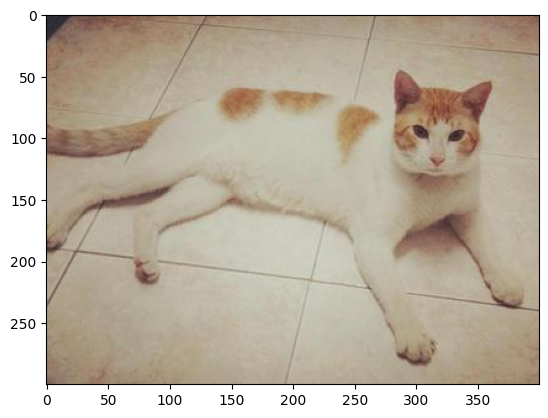

In [24]:
import random
img=io.imread(train['Images'][random.randint(0,8999)])
plt.imshow(img)

### Image Processing

The image processing is divided in different functions in order to separate the tasks : 
1. `extract_SIFT` : 
    1. Load images
    2. Convert to gray scale
    3. Extract SIFT (Scale-Invariant Feature Transform) keypoints and descriptors
    4. return the SIFT list
2. `clusterize`
    1. Stack the SIFT features
    2. Create the KMeans clusterizer
    3. Fit the clusterizer with the SIFT features
    4. return the clusterizer
3. `build_BOFs`
    1. Loop over Sift from extract_SIFT
        1. Predict the cluster labels for the SIFT features
        2. Create a histogram of cluster labels
        3. Normalize the histogram
        4. Store the histogram in the BOF representation
    2. Return the final BOF representation

4. `MyImageTransformer` : Final image transformer, using previously defined functions
    1. Initialise class MyImageTransformer and number of clusters needed
        1. `fit()` : Use function extract_SIFT(X) and clusterize(SIFTs, self.nb_cluster) to the input images
        2. `transform()` : extracts SIFT features from the input images using build_BOFs
        3. `fit_trainsform()` : other method to combine previously implemented fit() and transform()

The main structure of these functions were given by my professor and I had to complete them.

In [25]:
import cv2

def extract_SIFT(img_lst):
    sift = cv2.xfeatures2d.SIFT_create()
    sift_lst = []
    for img in img_lst:
        img=cv2.imread(img) #Load images
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Convert to gray scale
        kp, des = sift.detectAndCompute(gray, None) #Extract SIFT (Scale-Invariant Feature Transform) keypoints and descriptors
        sift_lst.append(des)
    
    return sift_lst

In [26]:
from sklearn.cluster import KMeans

def clusterize(SIFs, nb_cluster):
    sift_features = np.vstack(SIFs)#Stack the SIFT features
    clusterizer = KMeans(n_clusters=nb_cluster)# Create the KMeans clusterizer
    clusterizer.fit(sift_features)# Fit the clusterizer with the SIFT features
    return clusterizer


In [27]:
def build_BOFs(SIFTs, clusterizer):
    #Initialize the BOF representation
    bof_representation = np.zeros((len(SIFTs), clusterizer.n_clusters), dtype=np.float32)
    
    #Loop through the SIFT features
    for i, sift in enumerate(SIFTs):
        cluster_labels = clusterizer.predict(sift) #Predict the cluster labels for the SIFT features
        histogram = np.bincount(cluster_labels, minlength=clusterizer.n_clusters) #Create a histogram of cluster labels
        histogram = histogram / histogram.sum() #Normalize the histogram
        bof_representation[i, :] = histogram #Store the histogram in the BOF representation
    
    return bof_representation

# **Image transformer implementation** : `MyImageTransformer()`

In this transformer, I used the previously defined image processing functions to process the image feature `Images` inside the pipeline.

I used **4 as default nb_cluster** because it was the optimal parameters according to the cross validations you will see later during the training of the model. I chose to put the default value here to have a cleaner view on the pipeline below that is already complex enough.

In [28]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin


class MyImageTransformer(BaseEstimator,TransformerMixin): # Initialise class MyImageTransformer and nb of clusters
    def __init__(self, nb_cluster=4):
        self.nb_cluster=4

    def fit(self, X, y=None): #Use function extract_SIFT(X) and clusterize(SIFTs, self.nb_cluster) to the input data
        self.SIFTs = extract_SIFT(X)
        self.clusterizer = clusterize(SIFTs, self.nb_cluster)
        
    def transform(self, X, y=None): #transform input images and return bof representation using build_BOFs()
        self.SIFTs = extract_SIFT(X)
        return build_BOFs(self.SIFTs, self.clusterizer)
    
    def fit_transform(self, X, y=None): #transform and fit the data using all the previously defined function
        self.SIFTs = extract_SIFT(X)
        self.clusterizer = clusterize(self.SIFTs, self.nb_cluster)
        return build_BOFs(self.SIFTs, self.clusterizer)
    

# **Age transformer implementation** : `AgeConverter()`

As cat's and dog's ages does not rely on the same system, we need to scale it to real human age in order that the model understand better this features. 

Plus, it is one of the most import feature as people tend to adopt more younger animals than older ones, thus it has a major impact on the target `AdoptionSpeed`.

Source for animal age scale : https://www.biocanina.com/quel-age-humain-a-mon-chien-ou-mon-chat#:~:text=11%20%C3%A0%2012%20ans%20chez,chez%20les%20tr%C3%A8s%20grands%20chiens

This transformer is dividing cat's age by 5 and dog's age by 7 (maybe this could be improved with further investigations into the age/dog age's system).

`Edit :` I observe an increase of accuracy when I use this transformer compared to when I do not use it. It shows that it was a good idea to scale ages according to the race.


In [29]:
class AgeConverter(BaseEstimator,TransformerMixin):
    def __init__(self, cat_scale=5, dog_scale=7):
        self.cat_scale = cat_scale
        self.dog_scale = dog_scale
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_conv = X.copy()
        X_conv.loc[X_conv['Type'] == 'Cat', 'Age'] = X_conv.loc[X_conv['Type'] == 'Cat', 'Age'] / self.cat_scale
        X_conv.loc[X_conv['Type'] == 'Dog', 'Age'] = X_conv.loc[X_conv['Type'] == 'Dog', 'Age'] / self.dog_scale
        return X_conv

### Prepare train and test datasets :


In [30]:
df=train.copy()

**Let's check the number of classes in the dataset**

In [31]:
adoption_counts = {}

for i in range(5):
    adoption_counts[i] = (df['AdoptionSpeed'] == i).sum()
df_counts = pd.DataFrame.from_dict(adoption_counts, orient='index', columns=['Count'])
df_counts

,Count
0,247
1,1894
2,2504
3,2061
4,2294


We can see that the data is **unbalanced for class 0** because it contains the number of elements for class 0 is less than 10% of the number from class 2.

Let's perform **data augmentation with oversampling** for this class.

In [32]:
augmented_data = pd.concat([df, df[df['AdoptionSpeed'] == 0].sample(n=1500, replace=True)])
adoption_counts = {}
for i in range(5):
    adoption_counts[i] = (augmented_data['AdoptionSpeed'] == i).sum()
df_counts = pd.DataFrame.from_dict(adoption_counts, orient='index', columns=['Count'])
df_counts

,Count
0,1747
1,1894
2,2504
3,2061
4,2294


Here, I put the target **AdoptionSpeed** inside y_train in order to extract the target.

In [33]:
#Using a copy in case I change the dataset by mistakes
X_test=test.copy()

#Dropping target
X_train = augmented_data.drop(['AdoptionSpeed'], axis = 1)

#Defining the target in y_train
y_train = np.array(augmented_data['AdoptionSpeed']).reshape((-1,1))

#Print shapes of different dataset
print("X_train :",X_train.shape,"\ny_train :",y_train.shape)
print("\nX_test :",X_test.shape)

X_train : (10500, 16) 
y_train : (10500, 1)

X_test : (500, 16)


Defining different categories of features again to acces it faster.

In [34]:
numerical_cols = ['Age', 'Fee']
categorical_cols = ['Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Breed']
text_cols = ['Description'] 
img_cols=['Images']

This functions `getMetrics(y_pred)` will be used to display the different metrics and confusion matrix corresponding to the predictions obtained. However the **metric** that will be used to evaluate the model is **quadratic weighted kappa score** using `cohen_kappa_score(weights='quadratic')` from skelarn.

In [35]:
def getMetrics(y_train,y_pred):
    y_pred=y_pred.astype(int)
    mse_train = mean_squared_error(y_train, y_pred)
    r2_train= r2_score(y_train,y_pred)
    f1_train = f1_score(y_train, y_pred,average="macro")
    acc_train = accuracy_score(y_train, y_pred)
    kappa_train=cohen_kappa_score(y_train,y_pred,weights="quadratic")
    train=[['Train',mse_train,r2_train,f1_train,acc_train,kappa_train]]
    metrics=['Dataset','MSE','R2','F1','Acc','Kappa']
    df = pd.DataFrame(train, columns=metrics) 
    return df,ConfusionMatrixDisplay.from_predictions(y_train, y_pred.astype(int), cmap="Blues")



<span style="color:red">**`Notebook_mode :` As putting everything in comment is not really the best idea to visualize the code, I chose to implement a `Notebook_mode` when it is equal to 1, everything will be able to be executed, when is equal to 0 or else, it will pass the code cells without executing the code inside. When the project will be submitted, the mode will be 0 so the code is more readable.**</span>

Also, it was very usefull while building the lab when I restart and execute all to execute only what I want.

**`Edit : Submition Part`, I put in execution mode every cells needed in order to execute the final model, and everything else in comment. (The implementation of the pipelines needed and the bagging part using those).**

The cells used for the last model will be noted **<span style="color:BLUE">LAST SUBMITION CELL</span>** so you can search easily.

In [36]:
Notebook_mode=0

**First, simple pipeline** : Let's define a simple pipeline before applying Cross Validation to see if everything is working well

This pipeline is made of 4 transformers :
1. For numerical columns : `MinMaxScaler()`
2. For categorical columns : `OneHotEncoder()` with parameter `handle_unknown='ignore'` because some elements of breeds of the test set are not in the train set 
3. For Images : The previously defined `MyImageTransformer()`
4. For text : `CountVectorizer()`
5. For age scaling between cat and dog : `AgeConverter()`

And a `RandomForestClassifier()` as a classifier.

In [37]:
# %%time 
# if (Notebook_mode==1):
#     pipeline=Pipeline(steps=[
#         #no need simple imputer as there is no missing value
#         #normalize:
#         ('age',AgeConverter()), #Do the age in first so it can normalize after
#         ("normalizer",ColumnTransformer(transformers=[
#             ('num',MinMaxScaler(),numerical_cols),
#             ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),#Handle unknown very important as there is some breed in test that are not in train
#             ('img',MyImageTransformer(),'Images'), 
#             ('text',MyTextTransformer(),'Description'),
#         ])),
#         ('clf',RandomForestClassifier())
#     ])


#     pipeline.fit(X_train, np.array(y_train).ravel())

In [38]:
# if (Notebook_mode==1):
#     pipe_pred=pipeline.predict(X_train)
#     getMetrics(y_train,pipe_pred)


Everything seems working well.

### Cross validation search :

Defining the function `myCrossVal(model,classifier_param_grid)` in order to use it on each model I want.

In a first time, I chose to use `RandomizedSearchCV()` because with all the images and data we had, it was way faster than `GridSearchCV()`. But as I started the project and in the end,  really early, I had time to perform some `GridSearchCV()` on some models too. 

The metric to evaluate the cross validation is `cohen_kappa_score(weights='quadratic')` implemented in the cell below.


This function **takes as inputs a model and a grid of parameters.** Thus, I executed this function for each model I wanted to try and then selected the best parameters for each models.

It contains differents steps :
1. Create a pipeline that is quite similar to the previous one.
2. Execute `RandomizedSearchCV()` or `GridSearchCV()` to find best parameters.
3. Fit the new obtained pipeline to the train data.
4. Return the pipeline with the supposed best parameters.
5. The function also gives the execution time.

Even if some default transformers are implemented (like MinMaxScaler()), it will change during the CV according to the parameters stocked in the parameters grid.

In a first time, I tried all my cross-validation without the Image Transformer but with all the data. I had pretty good results but I felt like something was missing. I was able to then perform some cross validation with the images inside (with a balanced and reduced dataset that is defined below). I ended up having better results by doing cross-validation with Images so I kept this technique working.

After having all the best parameters, i finally trained the models on the whole dataset.


In [39]:
from sklearn.metrics import make_scorer
kappa_score = make_scorer(cohen_kappa_score, weights='quadratic')

In [40]:


from sklearn.model_selection import GridSearchCV

def myCrossVal(model,classifier_param_grid):
    start_time = time.time()

    pipeline=Pipeline(steps=[
        #no need simple imputer as there is no missing value
        #normalize:
        ('age',AgeConverter()), #Do the age in first so it can normalize after
        ("normalizer",ColumnTransformer(transformers=[
            ('num',MinMaxScaler(),numerical_cols),
            ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),#Handle unknown very important as there is some breed in test that are not in train
            ('img',MyImageTransformer(),'Images'), 
            ('text',MyTextTransformer(),'Description')

        ])),
        ('clf',model)
    ])
    #grid= RandomizedSearchCV(pipeline, classifier_param_grid, cv=5,verbose=3,scoring=kappa_score) #Way faster than gridsearch
    grid= GridSearchCV(pipeline, classifier_param_grid, cv=5,verbose=3,scoring=kappa_score) #Can be usefull depending on the time you have and the model selected


    grid.fit(X_train_reduced, np.array(y_train_reduced).ravel())
    print("--- Grid Execution : %s seconds ---" % (time.time() - start_time))
    return grid


# Cross Validation :
For each model, I created a grid of parameters in order to test every paramaters that seemed important to me.

In the code below, I take 800 elements of each class in order to train the model and find the best parameters.

In [41]:
# if (Notebook_mode==1):

#     train_reduced = pd.DataFrame()

#     for i in range(5):
#         df_i = augmented_data[augmented_data['AdoptionSpeed'] == i]
#         df_i = df_i[:800]
#         train_reduced = pd.concat([train_reduced, df_i])

#     train_reduced = train_reduced.sample(frac=1).reset_index(drop=True)
#     X_train_reduced = train_reduced.drop(['AdoptionSpeed'], axis = 1)
#     y_train_reduced = np.array(train_reduced['AdoptionSpeed']).reshape((-1,1))


#### RandomForestClassifier Cross Validation :

The `n_estimators` and `max_depth` parameters are important because they directly control the number of decision trees in the random forest classifier, as well as the complexity of each decision tree.


In [42]:
# if (Notebook_mode==1):
#     forest_param_grid = [
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#             'clf__n_estimators': [10, 100, 1000],
#             'clf__max_depth': [None, 5, 10,100]
#         },
#          {
#              'normalizer__num':[StandardScaler()],
#              'normalizer__num__copy': [True,False],
#              'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#              'clf__n_estimators': [10, 100,1000],
#              'clf__max_depth': [None,5, 10,100]
#          },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[CountVectorizer()],
#             'clf__n_estimators': [10, 100, 1000],
#             'clf__max_depth': [None, 5, 10,100]
#         },
#          {
#              'normalizer__num':[StandardScaler()],
#              'normalizer__num__copy': [True,False],
#              'normalizer__cat':[CountVectorizer()],
#              'clf__n_estimators': [10, 100,1000],
#              'clf__max_depth': [None,5, 10,100]
#          }
#     ]

#     RandomForestGrid=myCrossVal(RandomForestClassifier(),forest_param_grid)


In [43]:
# if (Notebook_mode==1):
#     forest_pred=RandomForestGrid.predict(X_train)
#     getMetrics(y_train,forest_pred)

#     #[CV 2/5] END clf__max_depth=None, clf__n_estimators=1000, normalizer__cat=OneHotEncoder(handle_unknown='ignore'), normalizer__num=MinMaxScaler(), normalizer__num__feature_range=(0, 1);, score=0.605 total time= 4.8min

#### SVR() Cross Validation :

The `kernel`, `degree`, and `gamma` parameters are important because they determine the type of kernel function used in the SVM classifier, as well as the degree of the polynomial kernel and the kernel coefficient gamma. To me, it is the three most important parameter of `SVR()`

In [44]:
# if (Notebook_mode==1):
#     svr_param_grid=[{
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'clf__kernel': ["linear","poly",'rbf','sigmoid'],
#             'clf__degree': [3,6,9,12],
#             'clf__gamma': ["scale", "auto"]
#         },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#             'clf__kernel': ["linear","poly",'rbf','sigmoid'],
#             'clf__degree': [3,6,9,12],
#             'clf__gamma': ["scale", "auto"]
#         },
#          {
#              'normalizer__num':[StandardScaler()],
#              'normalizer__num__copy': [True,False],
#              'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#              'clf__kernel': ["linear","poly",'rbf','sigmoid'],
#              'clf__degree': [3,6,9,12],
#              'clf__gamma': ["scale", "auto"]
#          },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[CountVectorizer()],
#             'clf__kernel': ["linear","poly",'rbf','sigmoid'],
#             'clf__degree': [3,6,9,12],
#             'clf__gamma': ["scale", "auto"]
#         },
#          {
#              'normalizer__num':[StandardScaler()],
#              'normalizer__num__copy': [True,False],
#              'normalizer__cat':[CountVectorizer()],
#              'normalizer__cat__ngram_range':[(0, 2), (3, 4)],
#              'clf__kernel': ["linear","poly",'rbf','sigmoid'],
#              'clf__degree': [3,6,9,12],
#              'clf__gamma': ["scale", "auto"]
#          }]

#     SVRGrid=myCrossVal(SVR(),svr_param_grid)
#     SVRGrid


In [45]:
# if (Notebook_mode==1):

#     svr_pred=SVRGrid.predict(X_train).astype(int)
#     getMetrics(y_train,svr_pred)


#### LinearRegression Cross Validation :

`fit_intercept` is important because it determines whether or not the linear regression model should include an intercept term, it is a constant value added to the prediction equation, which allows the model to account for the baseline value of the response variable when all input features are zero.

In [46]:
# if (Notebook_mode==1):

#     linreg_param_grid=[{
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'clf__fit_intercept': [True, False]
#         },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#             'clf__fit_intercept': [True, False]

#         },
#          {
#              'normalizer__num':[StandardScaler()],
#              'normalizer__num__copy': [True,False],
#              'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#              'clf__fit_intercept': [True, False]
#          },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[CountVectorizer()],
#             'clf__fit_intercept': [True, False]
#         },
#          {
#              'normalizer__num':[StandardScaler()],
#              'normalizer__num__copy': [True,False],
#              'normalizer__cat':[CountVectorizer()],
#              'clf__fit_intercept': [True, False]
#          }]
#     linRegGrid=myCrossVal(LinearRegression(),linreg_param_grid)
#     linRegGrid


In [47]:
# if (Notebook_mode==1):
#     linReg_pred=linRegGrid.predict(X_train).astype(int)
#     getMetrics(y_train,linReg_pred)


#### KNeighborsClassifier Cross Validation :

`n_neighbors` is an important parameters because it specifies the number of neigbors to ocnsider when we make a prediction on a data point, it is the pure concept of this algorithm

`weight` is also important because according to the weight function, the prediction can change a lot.

lastly, `p` specifies the distance used, Manhatan or euclidian, the needed distance can vary according to the problem.

In [48]:
# if (Notebook_mode==1):

#     Kneighbours_param_grid=[{
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'clf__n_neighbors': [3, 5, 7, 9, 11],
#             'clf__weights': ['uniform', 'distance'],
#             'clf__p': [1, 2]
#         },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#             'clf__n_neighbors': [3, 5, 7, 9, 11],
#             'clf__weights': ['uniform', 'distance'],
#             'clf__p': [1, 2]

#         },
#          {
#              'normalizer__num':[StandardScaler()],
#              'normalizer__num__copy': [True,False],
#              'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#              'clf__n_neighbors': [3, 5, 7, 9, 11],
#              'clf__weights': ['uniform', 'distance'],
#              'clf__p': [1, 2]
#          },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[CountVectorizer()],
#             'clf__n_neighbors': [3, 5, 7, 9, 11],
#             'clf__weights': ['uniform', 'distance'],
#             'clf__p': [1, 2]
#         },
#          {
#              'normalizer__num':[StandardScaler()],
#              'normalizer__num__copy': [True,False],
#              'normalizer__cat':[CountVectorizer()],
#              'clf__n_neighbors': [3, 5, 7, 9, 11],
#              'clf__weights': ['uniform', 'distance'],
#              'clf__p': [1, 2]
#          }]
#     knbGrid=myCrossVal(KNeighborsClassifier(),Kneighbours_param_grid)
#     knbGrid


In [49]:
# if (Notebook_mode==1):

#     knb_pred=knbGrid.predict(X_train)
#     getMetrics(y_train,knb_pred)


#### LogisticRegression Cross Validation : 

`fit_intercept` is important as explained previously.

`C` is the inverse of regularization strength, it can help prevent overfitting depending on the stregth of the regularization.

`solver` are the algorithms to use in the optimization problem, the choice depends on the problem and the results can vary a lot according to this parameter.


In [50]:
# %%time
# if (Notebook_mode==1):

#     logReg_param_grid=[
#         {
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'clf__C': [1, 10, 100, 1000],
#             'clf__fit_intercept': [True, False],
#             'clf__solver':['newton-cg','sag','saga','lbfgs']
#         },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#             'clf__C': [1, 10, 100, 1000],
#             'clf__fit_intercept': [True, False],
#             'clf__solver':['newton-cg','sag','saga','lbfgs']

#         },
#          {
#             'normalizer__num':[StandardScaler()],
#             'normalizer__num__copy': [True,False],
#             'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#             'clf__C': [1, 10, 100, 1000],
#             'clf__fit_intercept': [True, False],
#             'clf__solver':['newton-cg','sag','saga','lbfgs']
#          },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[CountVectorizer()],
#             'clf__C': [1, 10, 100, 1000],
#             'clf__fit_intercept': [True, False],
#             'clf__solver':['newton-cg','sag','saga','lbfgs']
#         },
#          {
#             'normalizer__num':[StandardScaler()],
#             'normalizer__num__copy': [True,False],
#             'normalizer__cat':[CountVectorizer()],
#             'clf__C': [1, 10, 100, 1000],
#             'clf__fit_intercept': [True, False],
#             'clf__solver':['newton-cg','sag','saga','lbfgs']
#          }
#     ]

#     logRegGrid=myCrossVal(LogisticRegression(),logReg_param_grid)


In [51]:
# %%time
# if (Notebook_mode==1):
#     logReg_pred=logRegGrid.predict(X_train)
#     getMetrics(y_train,logReg_pred)


In [52]:
#[CV 4/5] END clf__C=10, clf__fit_intercept=False, clf__solver=lbfgs, normalizer__cat=OneHotEncoder(handle_unknown='ignore'), normalizer__num=MinMaxScaler(), normalizer__num__feature_range=(-1, 1);, score=0.521 total time= 2.9min

#### NaiveBayes Cross Validation : 

I only chose to focus the `alpha` paremeter because I had an overfitting problem with the NaiveBayes and I read that it can help prevent it and obtain a better score on unseen data.

In [53]:
# if (Notebook_mode==1):

#     Nb_param_grid=[{
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'clf__alpha': [0.1, 0.5, 1.0, 2.0]
#         },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#             'clf__alpha': [0.1, 0.5, 1.0, 2.0]
#         },
#          {
#             'normalizer__num':[StandardScaler()],
#             'normalizer__num__copy': [True,False],
#             'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#             'clf__alpha': [0.1, 0.5, 1.0, 2.0]
#          },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[CountVectorizer()],
#             'clf__alpha': [0.1, 0.5, 1.0, 2.0]
#         },
#          {
#             'normalizer__num':[StandardScaler()],
#             'normalizer__num__copy': [True,False],
#             'normalizer__cat':[CountVectorizer()],
#             'clf__alpha': [0.1, 0.5, 1.0, 2.0]
#          }]

#     NbGrid=myCrossVal(MultinomialNB(),Nb_param_grid)


In [54]:
# if (Notebook_mode==1):

#     Nb_pred=NbGrid.predict(X_train)
#     getMetrics(y_train,Nb_pred)


#### Boosting Cross Validation : 

In [55]:
# if (Notebook_mode==1):

#     Boost_param_grid=[{
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'clf__n_estimators': [50, 100, 200],
#             'clf__max_depth': [3, 5, 7],
#             'clf__subsample': [0.5, 0.75, 1.0],        
#             'clf__loss':['log_loss','deviance','exponential'],
#             'clf__learning_rate': [0.01, 0.1, 0.5]    },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#             'clf__n_estimators': [50, 100, 200],
#             'clf__max_depth': [3, 5, 7],
#             'clf__subsample': [0.5, 0.75, 1.0],        
#             'clf__loss':['log_loss','deviance','exponential'],
#             'clf__learning_rate': [0.01, 0.1, 0.5]    },
#          {
#             'normalizer__num':[StandardScaler()],
#             'normalizer__num__copy': [True,False],
#             'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#             'clf__n_estimators': [50, 100, 200],
#             'clf__max_depth': [3, 5, 7],
#             'clf__subsample': [0.5, 0.75, 1.0],        
#             'clf__loss':['log_loss','deviance','exponential'],
#             'clf__learning_rate': [0.01, 0.1, 0.5]     },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[CountVectorizer()],
#             'clf__n_estimators': [50, 100, 200],
#             'clf__max_depth': [3, 5, 7],
#             'clf__subsample': [0.5, 0.75, 1.0],        
#             'clf__loss':['log_loss','deviance','exponential'],
#             'clf__learning_rate': [0.01, 0.1, 0.5]},
#          {
#             'normalizer__num':[StandardScaler()],
#             'normalizer__num__copy': [True,False],
#             'normalizer__cat':[CountVectorizer()],
#             'clf__n_estimators': [50, 100, 200],
#             'clf__max_depth': [3, 5, 7],
#             'clf__subsample': [0.5, 0.75, 1.0],        
#             'clf__loss':['log_loss','deviance','exponential'],
#             'clf__learning_rate': [0.01, 0.1, 0.5]
#              }]

#     BoostGrid=myCrossVal(GradientBoostingClassifier(),Boost_param_grid)


In [56]:
# if (Notebook_mode==1):

#     Boost_pred=BoostGrid.predict(X_train)
#     getMetrics(y_train,Boost_pred)


**AdaBoost :**

Here, I only chose to focus on the `n_estimaor`, the `learning_rate` and the `algorithm` parameters, which are for me the most important in ada boost.

In [57]:
# if (Notebook_mode==1):

#     ada_param_grid=[{
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'clf__n_estimators': [50, 100, 200],
#             'clf__learning_rate': [0.01, 0.1, 1.0], 
#             'clf__algorithm': ['SAMME', 'SAMME.R'] 
#         },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#             'clf__n_estimators': [50, 100, 200],
#             'clf__learning_rate': [0.01, 0.1, 1.0], 
#             'clf__algorithm': ['SAMME', 'SAMME.R'] 
#         },
#          {
#             'normalizer__num':[StandardScaler()],
#             'normalizer__num__copy': [True,False],
#             'normalizer__cat':[OneHotEncoder(handle_unknown='ignore')],
#             'clf__n_estimators': [50, 100, 200],
#             'clf__learning_rate': [0.01, 0.1, 1.0], 
#             'clf__algorithm': ['SAMME', 'SAMME.R']
#          },
#         {
#             'normalizer__num':[MinMaxScaler()],
#             'normalizer__num__feature_range': [(0, 1), (-1, 1)],
#             'normalizer__cat':[CountVectorizer()],
#             'clf__n_estimators': [50, 100, 200],
#             'clf__learning_rate': [0.01, 0.1, 1.0], 
#             'clf__algorithm': ['SAMME', 'SAMME.R']
#         },
#          {
#             'normalizer__num':[StandardScaler()],
#             'normalizer__num__copy': [True,False],
#             'normalizer__cat':[CountVectorizer()],
#             'clf__n_estimators': [50, 100, 200],
#             'clf__learning_rate': [0.01, 0.1, 1.0], 
#             'clf__algorithm': ['SAMME', 'SAMME.R']
#          }]

#     adaGrid=myCrossVal(AdaBoostClassifier(),ada_param_grid)


In [58]:
# if (Notebook_mode==1):

#     ada_pred=adaGrid.predict(X_train)
#     getMetrics(y_train,ada_pred)


# Determine which is the best model

After executing all the cross validations for each models, it is time to train the pipeline with best parameters. For that, we need to use the whole dataset and create a validation set in order to see which are the bests models.



First, let's create a validation set :

In [59]:
# if (Notebook_mode==1):
#     from sklearn.model_selection import train_test_split
#     X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


**`Edit :` you can see some pipelines that are trained with X_train instead of X_train_new (the reduced for validation) because in the end of the project, I used these pipelines to perform Bagging, I then needed to train those with the whole dataset.** But for the test part, they were trained with X_train_new.

**Random Forest Best Pipeline :**

In [60]:
# if (Notebook_mode==1):
#     RandomForestGrid.best_params_


**<span style="color:BLUE">LAST SUBMITION CELL :</span>**

In [61]:
if (Notebook_mode==0):

    rdfImg=RandomForestClassifier(n_estimators=1000,max_depth=None)

    rdfPipeline=Pipeline(steps=[
        #no need simple imputer as there is no missing value
        #normalize:
        ('age',AgeConverter()), #Do the age in first so it can normalize after
        ("normalizer",ColumnTransformer(transformers=[
            ('num',MinMaxScaler(feature_range=(0,1)),numerical_cols),
            ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),#Handle unknown very important as there is some breed in test that are not in train
            ('img',MyImageTransformer(),'Images'),
            ('text',MyTextTransformer(),'Description')
        ])),
        ('clf',rdfImg)
    ])

    #rdfPipeline.fit(X_train_new, np.array(y_train_new).ravel()) #commented because i need all the train set for voting
    #rdfPipeline.fit(X_train, np.array(y_train).ravel()) #commented because will be fit in the bagging for submittion
    #rdfImg_pred=rdfPipeline.predict(X_val)
    #getMetrics(y_val,rdfImg_pred)

**SVR best Pipeline :**

In [62]:
# if (Notebook_mode==1):
#     SVRGrid.best_params_


In [63]:
# if (Notebook_mode==1):

#     SVRImg=SVR(kernel='sigmoid',gamma='auto',degree=6)

#     SVRPipeline=Pipeline(steps=[
#         #no need simple imputer as there is no missing value
#         #normalize:
#         ('age',AgeConverter()), #Do the age in first so it can normalize after
#         ("normalizer",ColumnTransformer(transformers=[
#             ('num',StandardScaler(copy=False),numerical_cols),
#             ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),#Handle unknown very important as there is some breed in test that are not in train
#             ('img',MyImageTransformer(),'Images'),
#             ('text',MyTextTransformer(),'Description')
#         ])),
#         ('clf',SVRImg)
#     ])

#     SVRPipeline.fit(X_train_new, np.array(y_train_new).ravel())
#     SVRImg_pred=SVRPipeline.predict(X_val)
#     getMetrics(y_val,SVRImg_pred)

**Linear regression best parameters :**

In [64]:
# if (Notebook_mode==1):
#     linRegGrid.best_params_


In [65]:
# if (Notebook_mode==1):

#     linRegImg=LinearRegression(fit_intercept=False)

#     linRegPipeline=Pipeline(steps=[
#         #no need simple imputer as there is no missing value
#         #normalize:
#         ('age',AgeConverter()), #Do the age in first so it can normalize after
#         ("normalizer",ColumnTransformer(transformers=[
#             ('num',MinMaxScaler(feature_range=(-1, 1)),numerical_cols),
#             ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),#Handle unknown very important as there is some breed in test that are not in train
#             ('img',MyImageTransformer(),'Images'),
#             ('text',MyTextTransformer(),'Description')
#         ])),
#         ('clf',linRegImg)
#     ])

#     linRegPipeline.fit(X_train_new, np.array(y_train_new).ravel())
#     linRegImg_pred=linRegPipeline.predict(X_val)
#     getMetrics(y_val,linRegImg_pred)

In [66]:
# if (Notebook_mode==1):
#     knbGrid.best_params_


**K Nearest Neighbors best pipeline :**

In [67]:
# if (Notebook_mode==1):

#     knbImg=KNeighborsClassifier(p=1,weights='distance',n_neighbors=3)

#     knbPipeline=Pipeline(steps=[
#         #no need simple imputer as there is no missing value
#         #normalize:
#         ('age',AgeConverter()), #Do the age in first so it can normalize after
#         ("normalizer",ColumnTransformer(transformers=[
#             ('num',StandardScaler(copy=True),numerical_cols),
#             ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),#Handle unknown very important as there is some breed in test that are not in train
#             ('img',MyImageTransformer(),'Images'),
#             ('text',MyTextTransformer(),'Description')
#         ])),
#         ('clf',knbImg)
#     ])

#     knbPipeline.fit(X_train_new, np.array(y_train_new).ravel())
#     knbImg_pred=knbPipeline.predict(X_val)
#     getMetrics(y_val,knbImg_pred)

**Logistic regression best pipeline :**

**<span style="color:BLUE">LAST SUBMITION CELL :</span>**

In [68]:
if (Notebook_mode==0):

    logRegImg=LogisticRegression(fit_intercept=False,C=10,solver='lbfgs')

    logRegPipeline=Pipeline(steps=[
        #no need simple imputer as there is no missing value
        #normalize:
        ('age',AgeConverter()), #Do the age in first so it can normalize after
        ("normalizer",ColumnTransformer(transformers=[
            ('num',MinMaxScaler(feature_range=(-1, 1)),numerical_cols),
            ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),#Handle unknown very important as there is some breed in test that are not in train
            ('img',MyImageTransformer(),'Images'),
            ('text',MyTextTransformer(),'Description')
        ])),
        ('clf',logRegImg)
    ])

    #logRegPipeline.fit(X_train_new, np.array(y_train_new).ravel()) #commented because I need all the train set for voting
    #logRegPipeline.fit(X_train, np.array(y_train).ravel()) #commented because will be fit in the bagging for submittion

    #logRegImg_pred=logRegPipeline.predict(X_val)
    #getMetrics(y_val,logRegImg_pred)
    


**Naive Bayes best pipeline :**

In [69]:
# if (Notebook_mode==1):

#     NBImg=MultinomialNB(alpha=0.1)
#     NBPipeline=Pipeline(steps=[
#         #no need simple imputer as there is no missing value
#         #normalize:
#         ('age',AgeConverter()), #Do the age in first so it can normalize after
#         ("normalizer",ColumnTransformer(transformers=[
#             ('num',MinMaxScaler(feature_range=(0, 1)),numerical_cols),
#             ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),#Handle unknown very important as there is some breed in test that are not in train
#             ('img',MyImageTransformer(),'Images'),
#             ('text',MyTextTransformer(),'Description')
#         ])),
#         ('clf',NBImg)
#     ])

#     NBPipeline.fit(X_train_new, np.array(y_train_new).ravel())
#     NBImg_pred=NBPipeline.predict(X_val)
#     getMetrics(y_val,NBImg_pred)

**Boosting best pipeline :** 

In [70]:
# if (Notebook_mode==1):

#     print(BoostGrid.best_params_)


**<span style="color:BLUE">LAST SUBMITION CELL :</span>**

In [71]:
if (Notebook_mode==0):

    BoostImg=GradientBoostingClassifier(subsample=0.75,n_estimators=100,max_depth=5,loss="log_loss",learning_rate=0.1)
    BoostPipeline=Pipeline(steps=[
        #no need simple imputer as there is no missing value
        #normalize:
        ('age',AgeConverter()), #Do the age in first so it can normalize after
        ("normalizer",ColumnTransformer(transformers=[
            ('num',MinMaxScaler(feature_range=(-1, 1)),numerical_cols),
            ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),#Handle unknown very important as there is some breed in test that are not in train
            ('img',MyImageTransformer(),'Images'),
            ('text',MyTextTransformer(),'Description')
        ])),
        ('clf',BoostImg)
    ])

    #BoostPipeline.fit(X_train_new, np.array(y_train_new).ravel()) #commented because i need all the train set for voting
    #BoostPipeline.fit(X_train, np.array(y_train).ravel()) #commented because will be fit in the bagging for submittion
    #BoostImg_pred=BoostPipeline.predict(X_val)
    #getMetrics(y_val,BoostImg_pred)

**Ada boost best pipeline :**

In [72]:
# if (Notebook_mode==1):
#     adaGrid.best_params_

In [73]:
# if (Notebook_mode==1):

#     AdaImg=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.0,n_estimators=200)
#     AdaPipeline=Pipeline(steps=[
#         #no need simple imputer as there is no missing value
#         #normalize:
#         ('age',AgeConverter()), #Do the age in first so it can normalize after
#         ("normalizer",ColumnTransformer(transformers=[
#             ('num',MinMaxScaler(feature_range=(-1, 1)),numerical_cols),
#             ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),#Handle unknown very important as there is some breed in test that are not in train
#             ('img',MyImageTransformer(),'Images'),
#             ('text',MyTextTransformer(),'Description')
#         ])),
#         ('clf',AdaImg)
#     ])

#     AdaPipeline.fit(X_train_new, np.array(y_train_new).ravel())
#     AdaImg_pred=AdaPipeline.predict(X_val)
#     getMetrics(y_val,AdaImg_pred)



### <span style="color:red">Finally, the best basic model I obtained was this logistic regression pipeline. But as you will see below, it is not the end of our improvements yet.</span>

**<span style="color:BLUE">LAST SUBMITION CELL :</span>**

In [74]:
if (Notebook_mode==0):
    logRegImg=LogisticRegression(fit_intercept=True,C=1,solver='saga')
    logRegPipelineBest=Pipeline(steps=[
        #no need simple imputer as there is no missing value
        #normalize:
        ('age',AgeConverter()), #Do the age in first so it can normalize after
        ("normalizer",ColumnTransformer(transformers=[
            ('num',StandardScaler(copy=False),numerical_cols),
            ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),#Handle unknown very important as there is some breed in test that are not in train
            ('img',MyImageTransformer(),'Images'),
            ('text',CountVectorizer(lowercase=True),'Description') 
        ])),
        ('clf',logRegImg)
    ])

    #logRegPipelineBest.fit(X_train_new, np.array(y_train_new).ravel())  #commented because i need all the train set for voting
    #logRegPipelineBest.fit(X_train, np.array(y_train).ravel()) #commented because will be fit in the bagging for submittion
    #logRegImg_predB2=logRegPipelineBest.predict(X_val)
    #getMetrics(y_val,logRegPipelineBest)

In [75]:
# if (Notebook_mode==1):
#     best_rate2=logRegPipelineB2.predict(X_test).astype(int)


# <span style="color:red">Bagging</span>


### <span style="color:red">As my score was still not perfect, I tried something different in order to have an even better score.</span>

I then decided to perform **Bagging** with some of the best models I had in order to have an even better score :

For that, I used the `VotingClassifier()`, I tested Voting and Averaging.


**Voting :**

Here, I perform voting technique with the best pipeline I obtained previously.

In [76]:
# from sklearn.ensemble import VotingClassifier

# if (Notebook_mode==1):
#     classifiers = [
#         ('bestModel', logRegPipelineBest),
#         ('logRegPipeline',logRegPipeline),
#         ('BoostPipeline',BoostPipeline),
#         ('RandomForest',rdfPipeline)
#     ]

#     voting_clf = VotingClassifier(classifiers, voting='hard')
#     voting_clf.fit(X_train, np.array(y_train).ravel())
#     vtg13=voting_clf.predict(X_test).astype(int)
#     vtg13


**Averaging :**

Here, I perform averaging technique with the best pipeline I obtained.

**<span style="color:BLUE">LAST SUBMITION CELL :</span>**

In [77]:
if (Notebook_mode==0):
    
    classifiers = [
    ('bestModel', logRegPipelineBest),
    ('logRegPipeline',logRegPipeline),
    ('BoostPipeline',BoostPipeline),
    ('RandomForest',rdfPipeline)
    ]

    
    averaging_clf = VotingClassifier(classifiers, voting='soft')
    averaging_clf.fit(X_train, np.array(y_train).ravel())
    avg13=averaging_clf.predict(X_test).astype(int)
    avg13

### <span style="color:RED">Averaging worked very good and gave me a better score than with my previous best models. I decided to keep this technique as the final model.</span>

# $\rightarrow$ averaging_clf is my best model


I selected this model by comparing with my validation set when I used it and also compared with the weekly submitions I did during the time of the project.

Has said previously, the metric used is the quadratic kappa score.


# Conclusion : Machine Learning Part

This project was very challenging, I have learn a lot of new things, how to work with transformers, how to combine multiple categories of data, how to process text and Images and others. 

It was really intersting to work on it, the cross validation part also made me aware about the time and computing power needed in order to process data. Thus, time management is really important. 

In the end, I really understood way better the power of Bagging techniques, I have seen a significant increase of my predictions while peforming voting and averaging, which was a good surprise.

# Deep Learning Part :

### Librairies

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Embedding, GRU, Dense, Concatenate, dot, TimeDistributed,RepeatVector, Activation, Lambda,Attention,Dense,Flatten,Embedding,LSTM,GRU, Dropout
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential

In a 1st time, as i am still in the process of understanding **CNN and image processing for deep learning**, I will try focus on the building of a **Sentiment Analysis** Neural Network.



In order to build this network, I tried to reproduced the one from the **Attentional_LSTM lab's** correction with GRU layers instead of LSTM, from the class Introduction To Deep Learning. 

Let's do a copy of the datasets :

In [80]:
if (Notebook_mode==1):

    X_train2=X_train.copy()
    y_train2=y_train.copy()
    X_test2=X_test.copy()

Let's take only the description as features for sentiment analysis :

In [81]:
if (Notebook_mode==1):
    X_train2 = np.array(X_train2['Description'].fillna("")).reshape((-1,1))
    X_train2.shape, y_train2.shape

In [82]:
if (Notebook_mode==1):
    X_test2 = np.array(X_test2['Description'].fillna("")).reshape((-1,1))
    X_test2.shape

OneHotEncode the y_train :

In [83]:
if (Notebook_mode==1):
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    y_train_encoded = ohe.fit_transform(y_train2)

First, in order to test the model, let's take a reduce the size of the dataset :

In [84]:
# X_train2=X_train2[0:500]
# y_train_encoded=y_train_encoded[0:500]

Define number of classes and length of vector :

In [85]:
if (Notebook_mode==1):

    n_classes = len(np.unique(y_train2))
    feature_vector_length = X_train2.shape[1]
    feature_vector_length, n_classes

Let's define some variable to use during the construction of the network :

In [86]:
if (Notebook_mode==1):

    max_tokens = 4000
    embedding_dim = 128
    units = 64
    batch_size=128
    epochs=500
    dropout_rate=0.5

Text Vectorization :

In [87]:
if (Notebook_mode==1):

    vectorize_layer = layers.TextVectorization(output_mode='int', max_tokens=max_tokens)
    vectorize_layer.adapt(X_train2) 
    print(vectorize_layer(X_train2).shape)
    vocab_size = len(vectorize_layer.get_vocabulary())

Now, let's build the model :

First, we start with the input and an embedding layer with the previously defined vectorize layer

In [88]:
if (Notebook_mode==1):

    inputs = layers.Input(shape=(1,), dtype=tf.string)
    x = vectorize_layer(inputs)
    x = layers.Embedding(vocab_size, embedding_dim, input_length=vocab_size, mask_zero=True)(x)


Here, we used GRU layers

In [89]:
if (Notebook_mode==1):

    gru1 = GRU(units=units, return_sequences=True)(x)
    gru2 = GRU(units=units, return_sequences=True,dropout=dropout_rate, recurrent_dropout=dropout_rate)(gru1)
    gru3 = GRU(units=units, return_sequences=True,dropout=dropout_rate, recurrent_dropout=dropout_rate)(gru2)


Here, we define the attention layer and scores

In [90]:
if (Notebook_mode==1):

    # Define the attention layer
    attention_scores = layers.Dense(1, activation='tanh')(gru3)
    attention_scores = layers.Flatten()(attention_scores)
    attention_weights = layers.Activation('softmax')(attention_scores)
    attention_weights = layers.RepeatVector(units)(attention_weights)
    attention_weights = layers.Permute([2, 1])(attention_weights)


Let's compute the context vector of the network :

In [91]:
if (Notebook_mode==1):

    # Compute the context vector
    weighted_hidden_states = layers.multiply([gru3, attention_weights])
    context_vector = layers.Lambda(lambda x: K.sum(x, axis=1))(weighted_hidden_states)

Define the output layer of the network :

In [92]:
if (Notebook_mode==1):

    outputs = layers.Dense(n_classes, activation='softmax')(context_vector)

Create the model by assembling inputs and outputs.

In [93]:
if (Notebook_mode==1):

    attention_model = Model(inputs=inputs, outputs=outputs)

Plot the summary of the model

In [94]:
if (Notebook_mode==1):

    attention_model.summary()

**The architecture of the network is :**

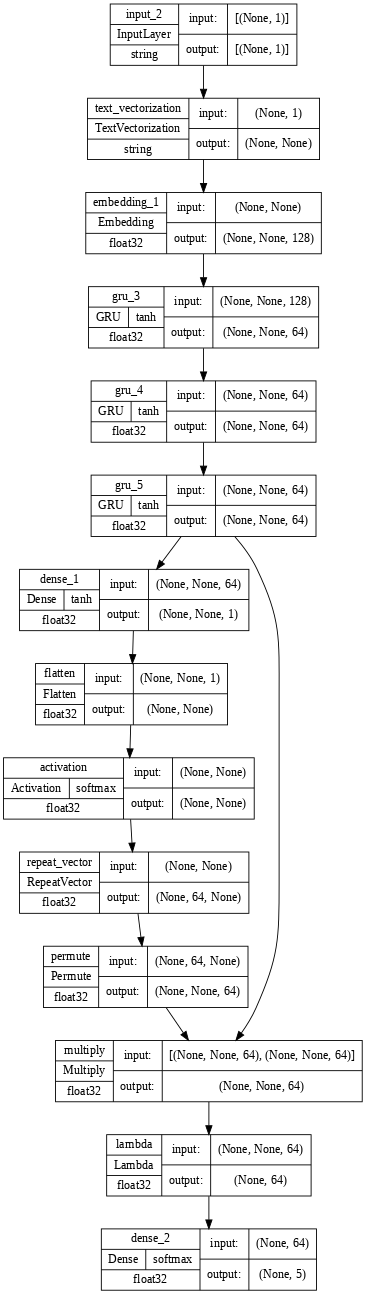

This model architecture includes an attention mechanism on top of **3 GRU layers** to better focus on relevant parts of the input sequence. 

The attention score layer generates a weight for each hidden state based on its relevance to the final output, which is then used to compute a weighted sequence of hidden states. The **context vector** is computed by summing over the sequence length dimension of the weighted hidden states tensor. 

Finally, the context vector is passed through a dense layer with a **softmax activation function** to generate the final output probabilities. The **attention mechanism** helps to focus on the most relevant parts of the input sequence, improving the model's ability to classify sequences accurately.

In [95]:
if (Notebook_mode==1):

    attention_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.Precision()])

In [96]:
if (Notebook_mode==1):

    callbacks_list = [EarlyStopping(monitor='val_precision', mode='max',
                                    patience=5,
                                    restore_best_weights=True)]

    history = attention_model.fit(X_train2, y_train_encoded, validation_split=0.3, callbacks=callbacks_list, batch_size=batch_size,epochs=epochs)

In [97]:
if (Notebook_mode==1):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26,8))

    ax1.plot(history.history['loss'], label="loss")
    ax1.plot(history.history['val_loss'], label="val_loss")
    ax1.legend()
    ax2.plot(history.history['precision'], label="precision")
    ax2.plot(history.history['val_precision'], label="val_precision")
    ax2.legend()
    plt.show()

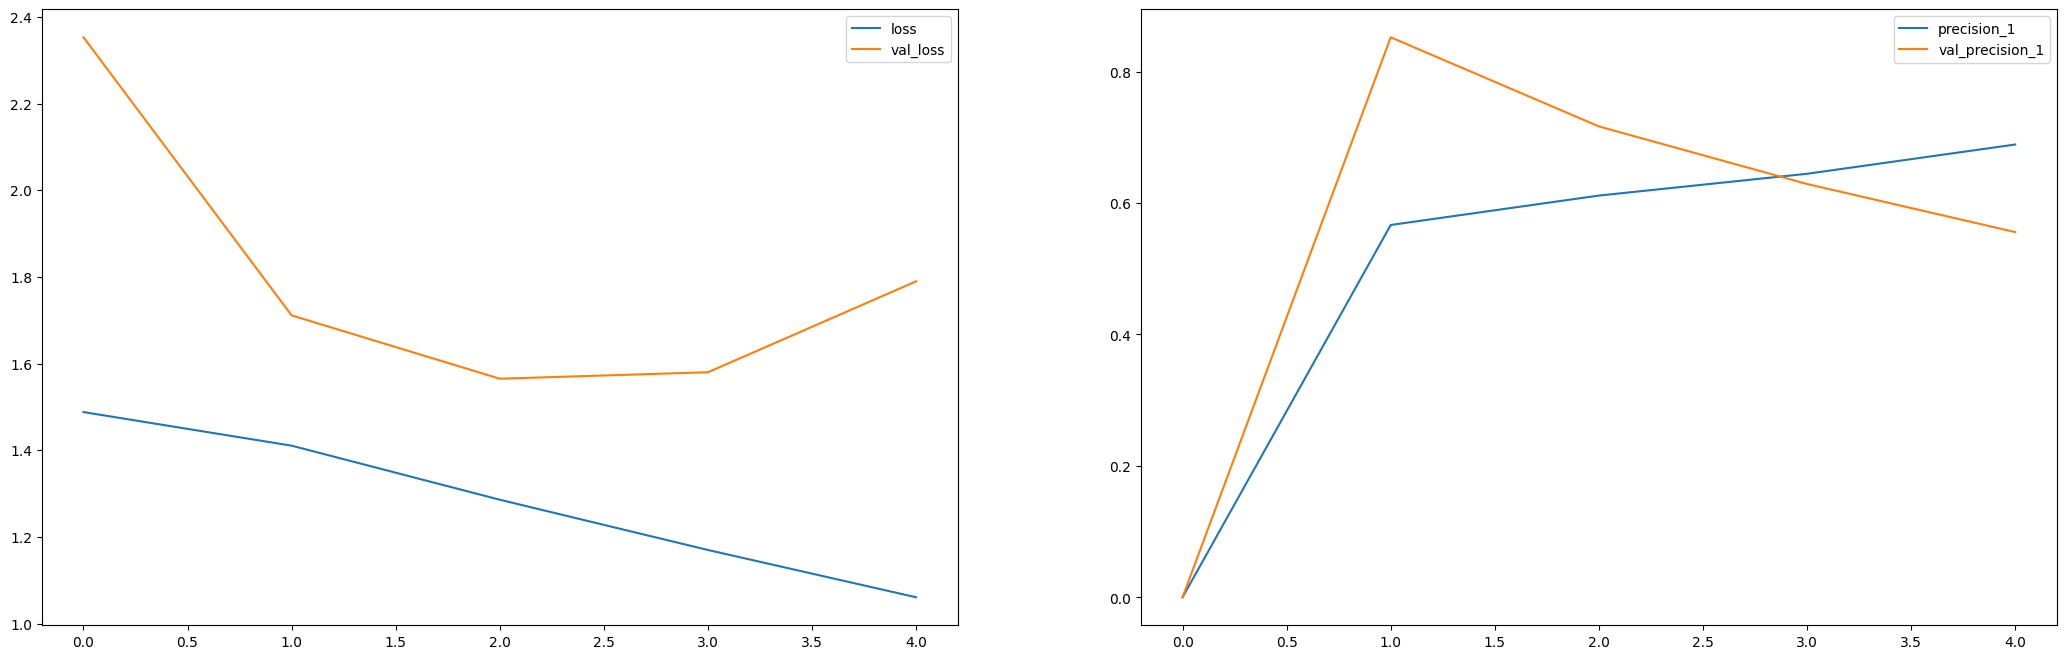

In [98]:
if (Notebook_mode==1):

    loss, precision = attention_model.evaluate(X_train2, y_train_encoded)
    print('Precision on the training dataset: %f' % (precision*100))
    print('Loss on the training dataset: %f' % (loss))

In [99]:
if (Notebook_mode==1):

    y_pred=attention_model.predict(X_train2)
    print(" Attention model with sentiment analysis and gru layers \n\n",classification_report(np.argmax(y_train_encoded,axis=1),np.argmax(y_pred,axis=1)))
    cm=confusion_matrix(np.argmax(y_train_encoded,axis=1),np.argmax(y_pred,axis=1))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    disp.plot()
    plt.title("Attention model with gru layers ")
    plt.show()

In [100]:
if (Notebook_mode==1):

    y_pred_test=np.argmax(attention_model.predict(X_test2),axis=1)


In [101]:
if (Notebook_mode==1):

    y_pred_test

## References

1. Preprocessing:
   1. Clean, Efficient Data Pipelines with Python's Sklearn. Towards Data Science. [Link](https://towardsdatascience.com/clean-efficient-data-pipelines-with-pythons-sklearn-2472de04c0ea)
   2. How to Tune Multiple ML Models with GridSearchCV at Once. Towards Data Science. [Link](https://towardsdatascience.com/how-to-tune-multiple-ml-models-with-gridsearchcv-at-once-9fcebfcc6c23)
   3. Machine Learning Text Processing. Towards Data Science. [Link](https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958)
   4. OpenCV SIFT (Scale-Invariant Feature Transform). OpenCV. [Link](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)
   5. Saini, M. (2020, April 17). Machine Learning Text Preprocessing | Sklearn | NLP | Python. YouTube. [Link](https://www.youtube.com/watch?v=WN18JksF9Cg)
   
2. Cross Validation and its drawbacks:
   1. Arlot, S., & Celisse, A. (2010). A survey of cross-validation procedures for model selection. Statistics Surveys, 4, 40-79. [Link](http://people.csail.mit.edu/romer/papers/CrossVal_SDM08.pdf)
   2. Singh, M. (2018, November 8). How to do cross-validation when using pipelines for data preparation and modeling. Medium. [Link](https://medium.com/@cmukesh8688/sklearn-pipeline-gridsearchcv-54f5552bbf4e)
   
3. Pipeline:
   1. Use Scikit-Learn Pipelines to Clean Data and Train Models Faster. Towards Data Science. [Link](https://towardsdatascience.com/use-scikit-learn-pipelines-to-clean-data-and-train-models-faster-82a5171f50dc)
4. Voting
    1. https://prutor.ai/voting-classifier-using-sklearn/
